#  Clase 7: Analisis de datos y repaso de otras clases

Para seguir el contenido de este cuaderno [dar clic aquí](https://nbviewer.jupyter.org/github/camilogavo/EstadisticaR/blob/master/Clase7.ipynb)

Los ejercicios pueden ser reproducidos directamente en RStudio.

Para esta clase trabajaremos con los datos de precios de petroleo utilizando paquetes de Tidyverse:

* Cargar datos
* Inspección e identificacion de datos faltantes
* Imputación de datos
* Cruces de tablas
* Agregación de datos (Tablas dinamicas)
* Correlaciones
* Taller


In [1]:
library(tidyverse) #Es una opcion para leer, organizar, transformar y graficar

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Serie Brent: Los datos tienen fecha de operacion y precios por barril
df_brent<-read_csv(file = 'https://raw.githubusercontent.com/datasets/oil-prices/master/data/brent-daily.csv', col_names = TRUE,cols(
  Date = col_date(format = ""),
  Price = col_double()
))

In [3]:
str(df_brent)

summary(df_brent)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	8026 obs. of  2 variables:
 $ Date : Date, format: "1987-05-20" "1987-05-21" ...
 $ Price: num  18.6 18.4 18.6 18.6 18.6 ...
 - attr(*, "spec")=
  .. cols(
  ..   Date = col_date(format = ""),
  ..   Price = col_double()
  .. )


      Date                Price       
 Min.   :1987-05-20   Min.   :  9.10  
 1st Qu.:1995-03-31   1st Qu.: 18.64  
 Median :2003-03-10   Median : 30.15  
 Mean   :2003-03-04   Mean   : 45.90  
 3rd Qu.:2011-01-25   3rd Qu.: 67.40  
 Max.   :2019-01-03   Max.   :143.95  

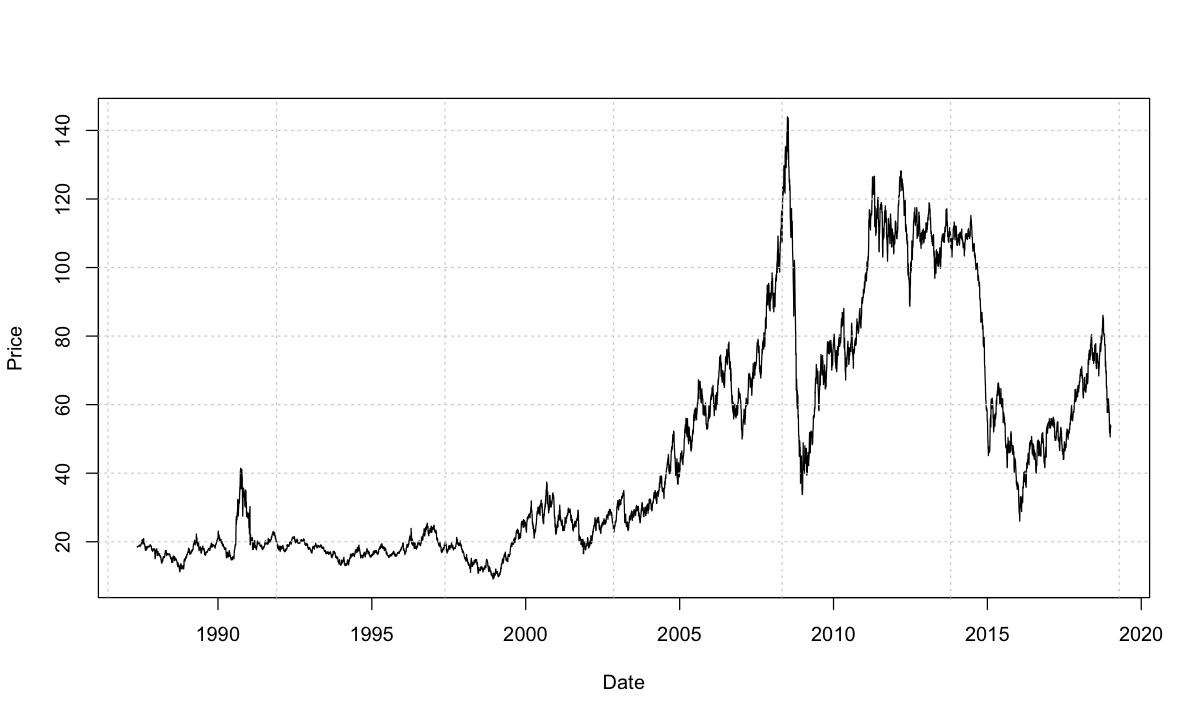

In [4]:
options(repr.plot.width=10, repr.plot.height=6)
with(df_brent,plot(x = Date,y = Price,type = 'l'))
grid()

In [5]:
#Serie WTI

df_wti<-read_csv(file = 'https://raw.githubusercontent.com/datasets/oil-prices/master/data/wti-daily.csv', col_names = TRUE,cols(
  Date = col_date(format = ""),
  Price = col_double()
))

str(df_wti)

summary(df_wti)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	8321 obs. of  2 variables:
 $ Date : Date, format: "1986-01-02" "1986-01-03" ...
 $ Price: num  25.6 26 26.5 25.9 25.9 ...
 - attr(*, "spec")=
  .. cols(
  ..   Date = col_date(format = ""),
  ..   Price = col_double()
  .. )


      Date                Price       
 Min.   :1986-01-02   Min.   : 10.25  
 1st Qu.:1994-03-02   1st Qu.: 19.61  
 Median :2002-06-11   Median : 30.02  
 Mean   :2002-06-17   Mean   : 43.77  
 3rd Qu.:2010-09-27   3rd Qu.: 64.26  
 Max.   :2019-01-03   Max.   :145.31  

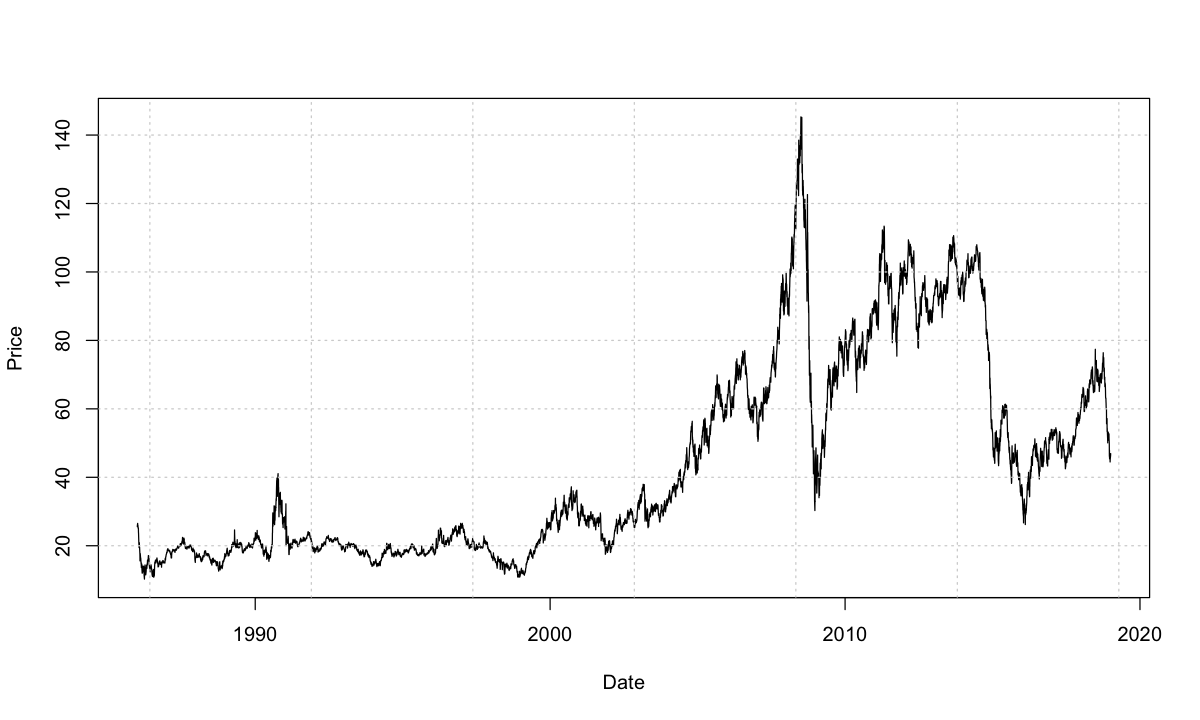

In [6]:
options(repr.plot.width=10, repr.plot.height=6)
with(df_wti,plot(x = Date,y = Price,type = 'l'))
grid()

In [7]:
#Dado que las series tienen diferentes fechas se debe homologar los datos con una funcion
homologar_fechas<-function(df, fecha_inicial, fecha_final){
    df<-df%>%filter(Date>=fecha_inicial)%>%filter(Date<=fecha_final)
    return(df)
}

In [8]:
df_brent<-homologar_fechas(df = df_brent,fecha_inicial = '2007-01-01',fecha_final = '2018-12-31')
df_wti<-homologar_fechas(df = df_wti,fecha_inicial = '2007-01-01',fecha_final = '2018-12-31')

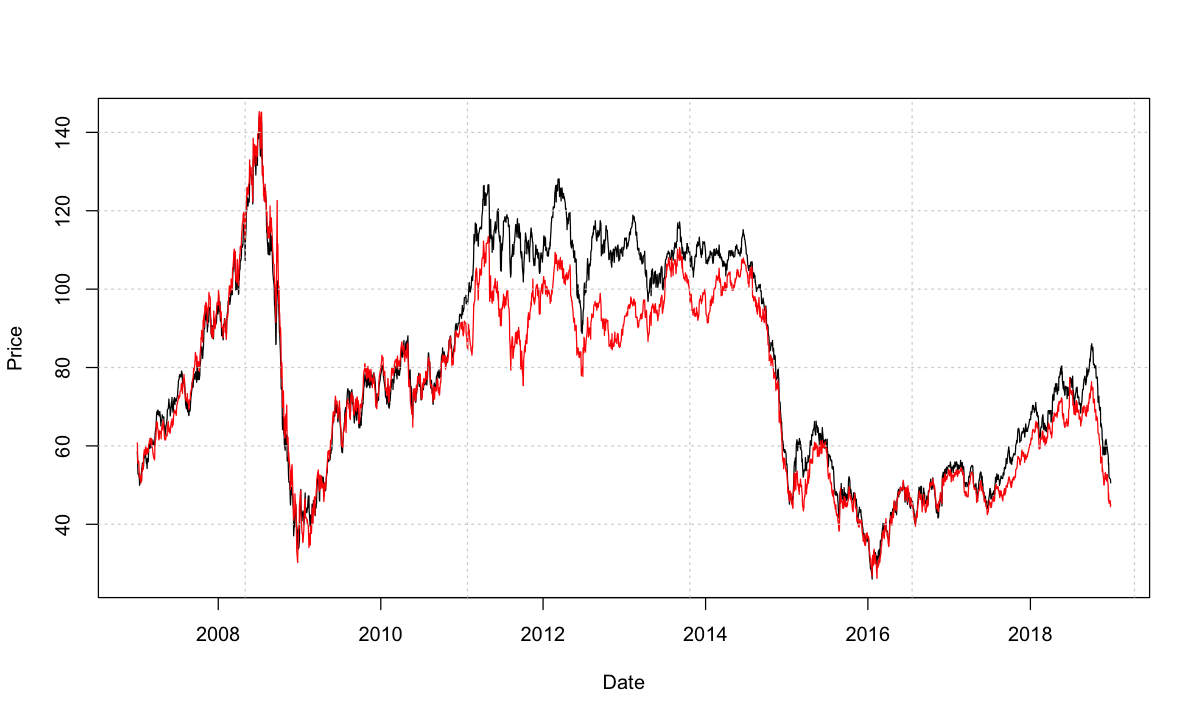

In [9]:
plot(df_brent,type = 'l')
lines(df_wti,col='red')
grid()

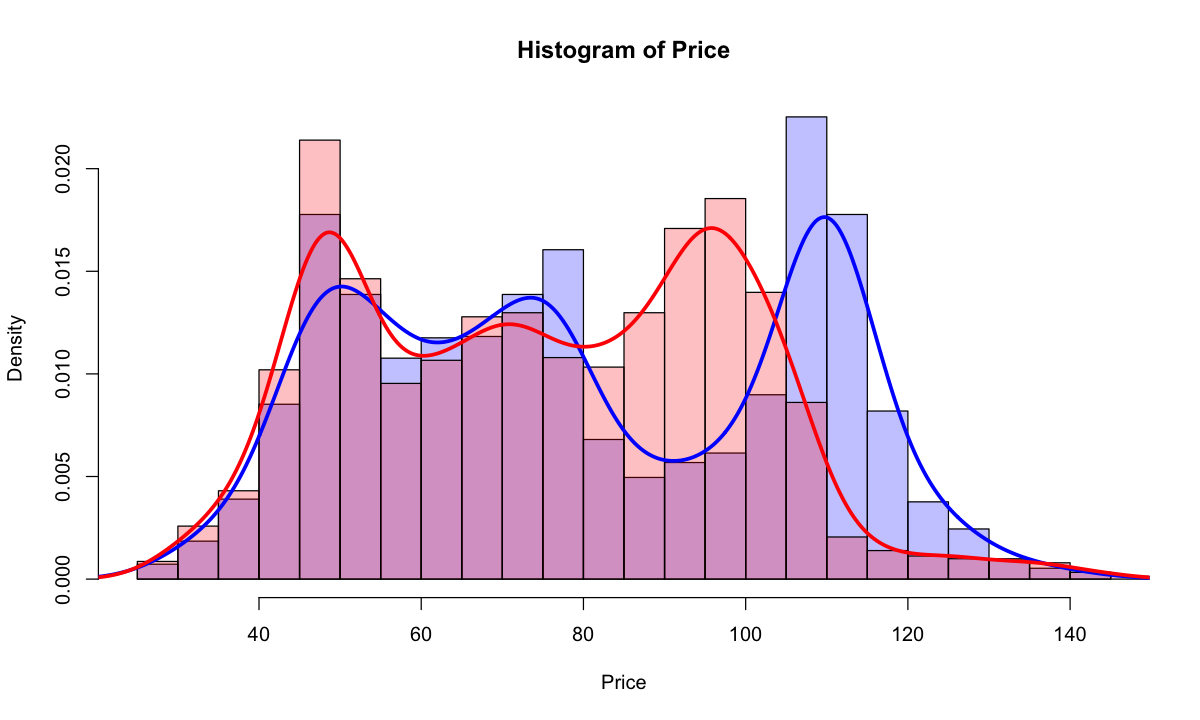

In [10]:
p1<-with(df_brent,hist(Price,breaks = 30, col = rgb(0,0,1,1/4),probability = TRUE))
p2<-with(df_wti,hist(Price,breaks = 30, add = T,col = rgb(1,0,0,1/4),probability = TRUE))

lines(density(df_brent$Price),col = 'blue',lwd=3)
lines(density(df_wti$Price),col = 'red',lwd=3)

In [11]:
#Crear un dataframe con los datos

length(df_brent$Price)
length(df_wti$Price)

[1] 3028

[1] 3020

# Para unir dos tablas, se debe emplear las funcion merge

_merge( x = df1, <br />
       y = df2, <br />
       all = TRUE/FALSE, # si TRUE, full join, si FALSE, inner join <br /> 
       by.x = campo similar del dataframe x, <br />
       by.y = campo similar del dataframe y, <br />
       all.x = TRUE/FALSE, # Esto es un left join <br />
       all.y = TRUE/FALSE) # Esto es un rigth join_ <br />

<img src="join.png" width=900>

In [12]:
# Left join de los datos
df<-merge(df_brent,df_wti,all.x = TRUE,by = 'Date')

In [13]:
# Imputacion de valores faltantes con el promedio de la serie
df$Price.y[!complete.cases(df$Price.y)]<-mean(df$Price.y,na.rm = TRUE)

colnames(df)<-c('Date','precios_brent','precios_wti')

# Obtener los precios promedios mensuales

Para obtener los precios mensuales, se debe utilizar la libreria _dplyr_

** Pasos para resumir datos **

|Accion|Funcion|
|------|-------|
|1. Ordenar los datos de la tabla| Arrange()|
|2. Crear la columna de agrupacion (En este caso, AAAA-MM para agrupar por año-mes)| mutate(ano_mes = |
|3. Agrupar por la nueva columna | group_by()|
|4. Crear columnas resumen| summarize(precios_mensuales_brent = mean(precios_brent), precios_mensuales_wti = mean(precios_wti)

#### Nota: Recuerde utilizar el pipeline de dplyr %>% (se puede interpretar como la palabra:  _luego_

In [14]:
head(df)

Date,precios_brent,precios_wti
2007-01-02,58.49,60.77
2007-01-03,56.63,58.31
2007-01-04,54.58,55.65
2007-01-05,52.82,56.29
2007-01-08,52.82,56.08
2007-01-09,52.38,55.65


In [15]:
df_mensuales<-df%>%
    mutate(ano_mes =paste0( str_sub(Date,start = 1,end = 7),'-01'))%>% #Crea una fecha estandar para indicar el ano_mes
    arrange(ano_mes)%>%                                                #ordena el dataframe por ano_mes
    group_by(ano_mes)%>%                                               #Agrupa los datos por ano_mes
    summarize(prom_brent = mean(precios_brent),                        #Resume los datos aplicando promedio
              prom_wti = mean(precios_wti))                            #



In [16]:
str(df_mensuales)   # Veamos la estructura final de dataframe ... se observan problemas con el campo ano_mes
df_mensuales$ano_mes <- as.Date(df_mensuales$ano_mes,format = '%Y-%m-%d')
str(df_mensuales)   # Veamos como queda corregido ... ok!!

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	144 obs. of  3 variables:
 $ ano_mes   : chr  "2007-01-01" "2007-02-01" "2007-03-01" "2007-04-01" ...
 $ prom_brent: num  53.7 57.6 62.1 67.5 67.2 ...
 $ prom_wti  : num  54.5 59.3 60.4 64.1 63.5 ...
Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	144 obs. of  3 variables:
 $ ano_mes   : Date, format: "2007-01-01" "2007-02-01" ...
 $ prom_brent: num  53.7 57.6 62.1 67.5 67.2 ...
 $ prom_wti  : num  54.5 59.3 60.4 64.1 63.5 ...


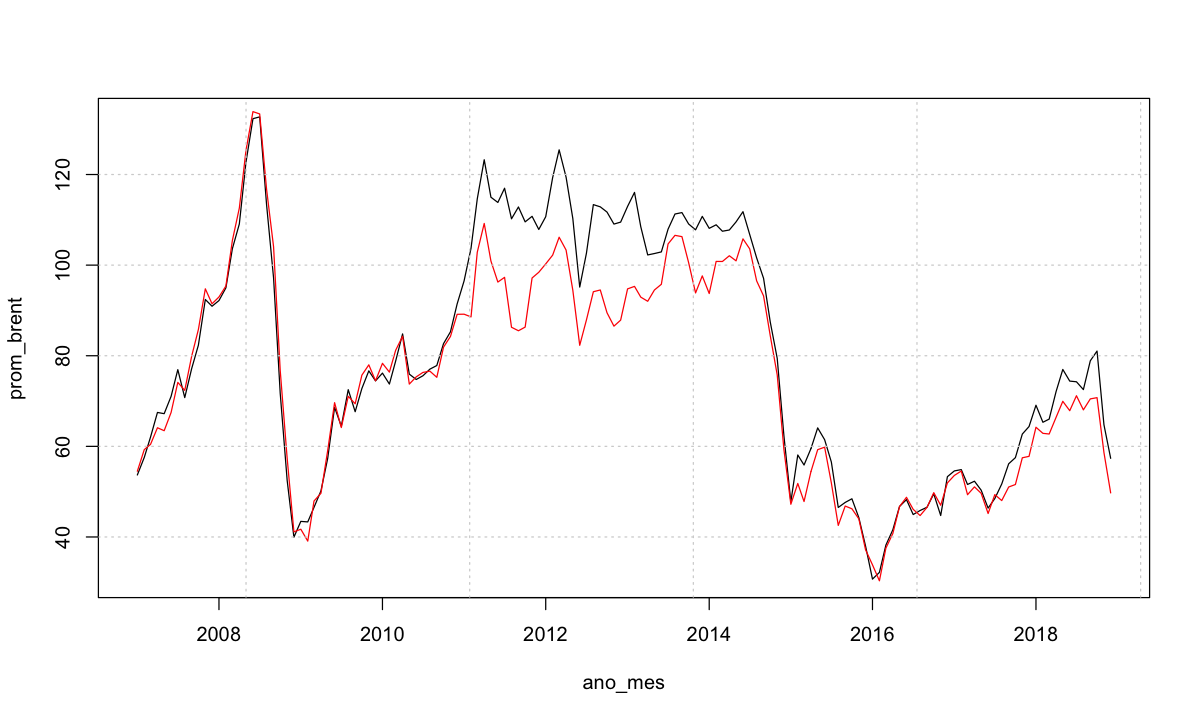

In [17]:
with(df_mensuales,plot(x = ano_mes,y = prom_brent, type='l'))
lines(x = df_mensuales$ano_mes,df_mensuales$prom_wti,col = 'red',type = 'l')
grid()

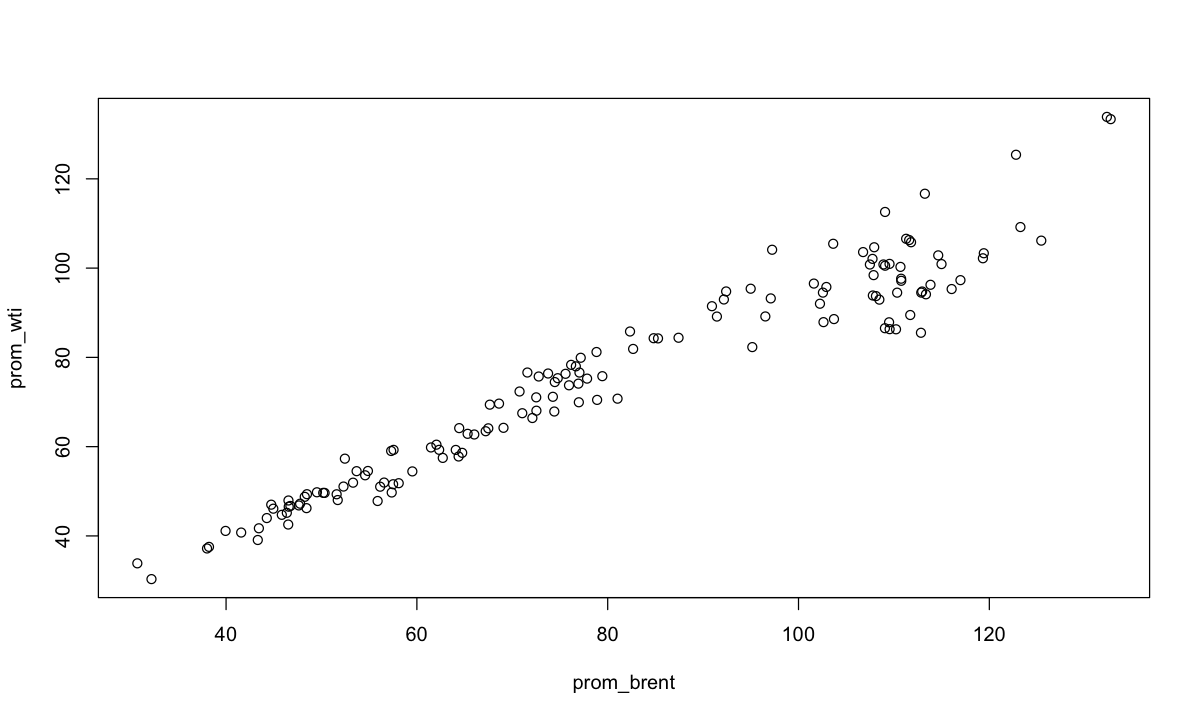

In [18]:
with(df_mensuales,plot(x = prom_brent,y = prom_wti, type='p'))


In [19]:
summary(df_mensuales[,2:3])

   prom_brent        prom_wti     
 Min.   : 30.70   Min.   : 30.32  
 1st Qu.: 57.12   1st Qu.: 54.23  
 Median : 76.41   Median : 75.53  
 Mean   : 80.17   Mean   : 75.20  
 3rd Qu.:107.89   3rd Qu.: 94.51  
 Max.   :132.72   Max.   :133.88  

# Taller:


* Precios mensuales del oro [dataset oro](https://raw.githubusercontent.com/datasets/gold-prices/master/data/monthly.csv)
* Indice de precios al consumidor (mensuales), indice S&P500 (mensuales) [dataset IPC y S&P500](https://raw.githubusercontent.com/datasets/s-and-p-500/master/data/data.csv)



1. Cree una funcion que lea los archivos mensuales sin descargarlos de la fuente
2. Utilice la funcion para leer los dos links entregados arriba
3. Describir los dataframes, identificar tipos de datos, corregir campos con tipo de dato equivocado (fechas que cargaron como strings)
4. Existen datos NA, corregir si es necesario utilizando el promedio
5. Cual es la distribucion de la serie del oro vs la serie del S&P500
6. Unir las tablas con resolucion mensual
7. Calcular la correlacion de Pearson con las 3 series
8. Agregar los datos de forma anual utilizando el promedio 
9. Guarde un archivo de excel con los datos agregados de forma anual.
10. Envie el excel al correo jcgaviriao@unal.edu.co



# Cargar el dataset de Precios de Oro

In [150]:
oro<-read_csv(file = 'https://raw.githubusercontent.com/datasets/gold-prices/master/data/monthly.csv', 
              col_names = TRUE)

Parsed with column specification:
cols(
  Date = col_character(),
  Price = col_double()
)


In [151]:
colnames(oro)<-gsub(colnames(oro),pattern = ' ', replacement = '_') #Se reemplazan los espacios en blanco para evitar problemas con la lectura de datos

In [152]:
#Estructura del dataset
str(oro)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	825 obs. of  2 variables:
 $ Date : chr  "1950-01" "1950-02" "1950-03" "1950-04" ...
 $ Price: num  34.7 34.7 34.7 34.7 34.7 ...
 - attr(*, "spec")=
  .. cols(
  ..   Date = col_character(),
  ..   Price = col_double()
  .. )


In [153]:
oro$Date<-paste0(oro$Date,'-01')

In [154]:
oro$Date<-as.Date(oro$Date)

In [155]:
oro%>%str() #equivalente a str(oro)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	825 obs. of  2 variables:
 $ Date : Date, format: "1950-01-01" "1950-02-01" ...
 $ Price: num  34.7 34.7 34.7 34.7 34.7 ...
 - attr(*, "spec")=
  .. cols(
  ..   Date = col_character(),
  ..   Price = col_double()
  .. )


In [156]:
oro%>%head(3) #equivalente a head(oro, n = 3)
oro%>%tail(3) #equivalente a tail(oro, n = 3)

Date,Price
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73


Date,Price
2018-07-01,1238.064
2018-08-01,1201.859
2018-09-01,1199.198


In [157]:
oro[!complete.cases(oro),] #filtrar las observaciones con datos NA
oro[!complete.cases(oro),]%>%nrow #Contar casos con datos NA
sapply(oro, function(x) sum(is.na(x)))

Date,Price


[1] 0

Date Price 
    0     0

In [158]:
summary(oro) #Resumen de los datos

      Date                Price        
 Min.   :1950-01-01   Min.   :  34.49  
 1st Qu.:1967-03-01   1st Qu.:  35.19  
 Median :1984-05-01   Median : 310.05  
 Mean   :1984-05-01   Mean   : 388.73  
 3rd Qu.:2001-07-01   3rd Qu.: 429.14  
 Max.   :2018-09-01   Max.   :1780.65  

# Cargar los datos del S&P500

In [159]:
sp500<-read_csv(file = 'https://raw.githubusercontent.com/datasets/s-and-p-500/master/data/data.csv',
               col_names= TRUE)

Parsed with column specification:
cols(
  Date = col_date(format = ""),
  SP500 = col_double(),
  Dividend = col_double(),
  Earnings = col_double(),
  `Consumer Price Index` = col_double(),
  `Long Interest Rate` = col_double(),
  `Real Price` = col_double(),
  `Real Dividend` = col_double(),
  `Real Earnings` = col_double(),
  PE10 = col_double()
)


In [160]:
colnames(sp500)<-gsub(colnames(sp500),pattern = ' ', replacement = '_') #Se reemplazan los espacios en blanco para evitar problemas con la lectura de datos

In [161]:
sp500%>%str() #equivalente a str(oro)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	1768 obs. of  10 variables:
 $ Date                : Date, format: "1871-01-01" "1871-02-01" ...
 $ SP500               : num  4.44 4.5 4.61 4.74 4.86 4.82 4.73 4.79 4.84 4.59 ...
 $ Dividend            : num  0.26 0.26 0.26 0.26 0.26 0.26 0.26 0.26 0.26 0.26 ...
 $ Earnings            : num  0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 ...
 $ Consumer_Price_Index: num  12.5 12.8 13 12.6 12.3 ...
 $ Long_Interest_Rate  : num  5.32 5.32 5.33 5.33 5.33 5.34 5.34 5.34 5.35 5.35 ...
 $ Real_Price          : num  89 87.5 88.4 94.3 98.9 ...
 $ Real_Dividend       : num  5.21 5.06 4.98 5.17 5.29 5.38 5.38 5.46 5.33 5.25 ...
 $ Real_Earnings       : num  8.02 7.78 7.67 7.96 8.14 8.27 8.27 8.4 8.21 8.08 ...
 $ PE10                : num  NA NA NA NA NA NA NA NA NA NA ...
 - attr(*, "spec")=
  .. cols(
  ..   Date = col_date(format = ""),
  ..   SP500 = col_double(),
  ..   Dividend = col_double(),
  ..   Earnings = col_double(),
  ..   `Consume

In [162]:
sp500%>%head(3) #equivalente a head(sp500, n = 3)
sp500%>%tail(3) #equivalente a tail(sp500, n = 3)

Date,SP500,Dividend,Earnings,Consumer_Price_Index,Long_Interest_Rate,Real_Price,Real_Dividend,Real_Earnings,PE10
1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NA
1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NA
1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NA


Date,SP500,Dividend,Earnings,Consumer_Price_Index,Long_Interest_Rate,Real_Price,Real_Dividend,Real_Earnings,PE10
2018-02-01,2705.16,49.64,NA,248.99,2.86,2714.34,49.81,NA,32.12
2018-03-01,2702.77,50.00,NA,249.55,2.84,2705.82,50.06,NA,31.99
2018-04-01,2642.19,NA,NA,249.84,2.80,2642.19,NA,NA,31.19


In [163]:
sp500[!complete.cases(sp500),] #filtrar las observaciones con datos NA
sp500[!complete.cases(sp500),]%>%nrow #Contar casos con datos NA

Date,SP500,Dividend,Earnings,Consumer_Price_Index,Long_Interest_Rate,Real_Price,Real_Dividend,Real_Earnings,PE10
1871-01-01,4.44,0.26,0.40,12.46,5.32,89.00,5.21,8.02,NA
1871-02-01,4.50,0.26,0.40,12.84,5.32,87.53,5.06,7.78,NA
1871-03-01,4.61,0.26,0.40,13.03,5.33,88.36,4.98,7.67,NA
1871-04-01,4.74,0.26,0.40,12.56,5.33,94.29,5.17,7.96,NA
1871-05-01,4.86,0.26,0.40,12.27,5.33,98.93,5.29,8.14,NA
1871-06-01,4.82,0.26,0.40,12.08,5.34,99.66,5.38,8.27,NA
1871-07-01,4.73,0.26,0.40,12.08,5.34,97.80,5.38,8.27,NA
1871-08-01,4.79,0.26,0.40,11.89,5.34,100.62,5.46,8.40,NA
1871-09-01,4.84,0.26,0.40,12.18,5.35,99.29,5.33,8.21,NA
1871-10-01,4.59,0.26,0.40,12.37,5.35,92.71,5.25,8.08,NA


[1] 124

In [164]:
sapply(sp500, function(x) sum(is.na(x)))

Date                SP500             Dividend 
                   0                    0                    1 
            Earnings Consumer_Price_Index   Long_Interest_Rate 
                   4                    0                    0 
          Real_Price        Real_Dividend        Real_Earnings 
                   0                    1                    4 
                PE10 
                 120

In [165]:
# Completar los NA con el promedio
sp500$Dividend[is.na(sp500$Dividend)]<-mean(sp500$Dividend,na.rm = TRUE)
sp500$Earnings[is.na(sp500$Earnings)]<-mean(sp500$Earnings,na.rm = TRUE)
sp500$Real_Dividend[is.na(sp500$Real_Dividend)]<-mean(sp500$Real_Dividend,na.rm = TRUE)
sp500$Real_Earnings[is.na(sp500$Real_Earnings)]<-mean(sp500$Real_Earnings,na.rm = TRUE)
sp500$PE10[is.na(sp500$PE10)]<-mean(sp500$PE10,na.rm = TRUE)


In [166]:
sp500[!complete.cases(sp500),]%>%nrow #Contar casos con datos NA

[1] 0

# Homologar fechas

In [173]:
homologar_fechas<-function(df,fecha_inicial, fecha_final){
    df<-df%>%
            filter(Date>=as.Date(fecha_inicial))%>%
            filter(Date<=as.Date(fecha_final))
    return(df)
}

In [201]:
oro<-homologar_fechas(oro,'1950-01-01','2017-12-01')
sp500<-homologar_fechas(sp500,'1950-01-01','2017-12-01')

# Distribucion de probabilidades 

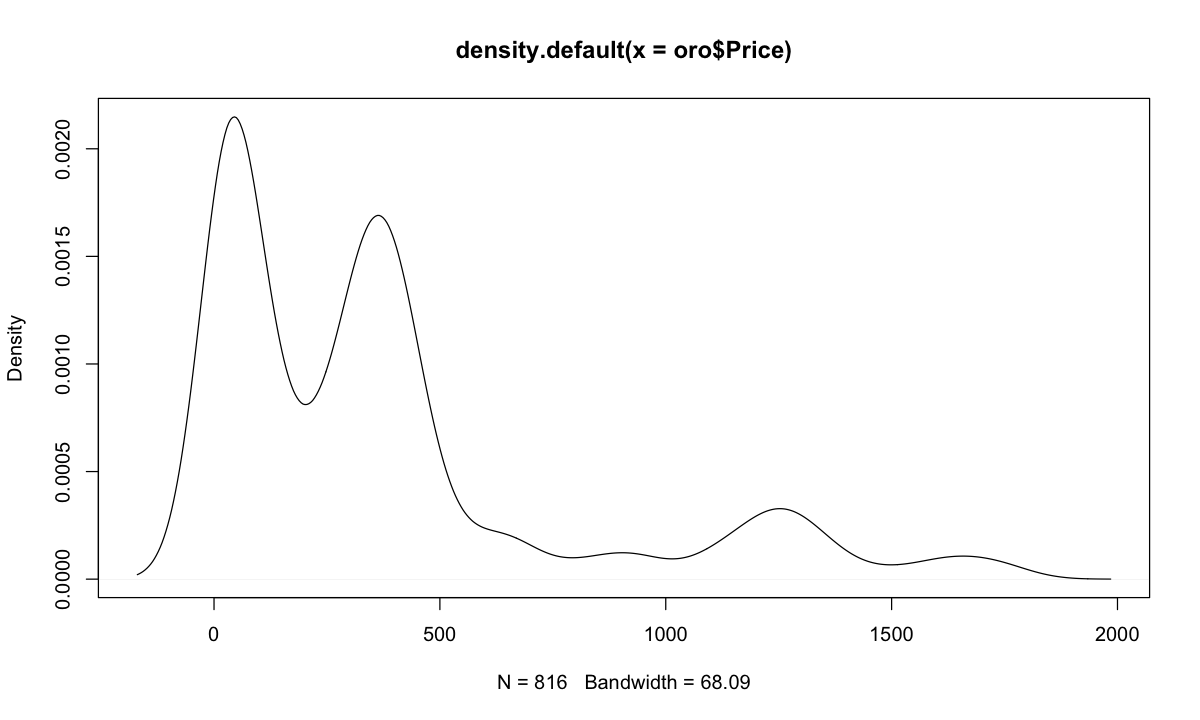

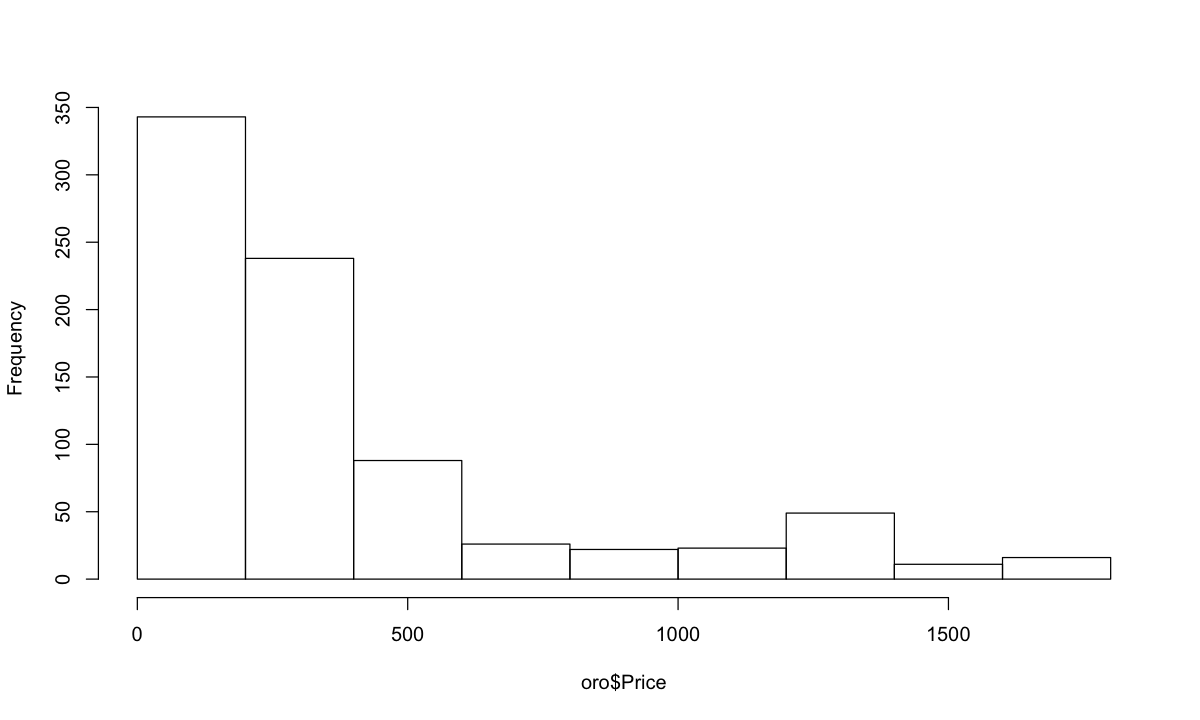

In [202]:
plot(density(oro$Price)) # Distribucion empirica
hist(oro$Price,main = '') #Histograma usando la funcion de r-base

In [203]:
df<-left_join(oro, sp500, by= 'Date') # union de las tablas por el campo Date
                                      # dado que el oro es la fecha más reciente se toma como tabla principal para evitar NA

In [204]:
#seleccion de variables
df_analisis<-df%>%select(Price, SP500, Consumer_Price_Index)

# Calcular correlación

In [205]:
# Matriz de correlacion
cor(df_analisis)

,Price,SP500,Consumer_Price_Index
Price,1.0000000,0.7934711,0.8487450
SP500,0.7934711,1.0000000,0.9115167
Consumer_Price_Index,0.8487450,0.9115167,1.0000000


# Resumir tablas usando dplyr

In [207]:
df_anual<-df%>%                                                  # Retomar el df luego de la union de las tablas
            select(Date, Price, SP500, Consumer_Price_Index)%>%  # Selecciona las variables de interes (incluye la fecha)
            mutate(ano=as.numeric(format(Date,'%Y')))%>%        # Crea la columna ano
            group_by(ano)%>%                                     # Antes de agregar datos se debe indicar los campos de agrupacion
            summarize(Price_anual_avg = mean(Price),
                      SP500_anual_avg = mean(SP500),
                      IPC_anual_avg = mean(Consumer_Price_Index))

In [208]:
df_anual%>%head
df_anual%>%tail

ano,Price_anual_avg,SP500_anual_avg,IPC_anual_avg
1950,34.72917,18.40000,24.06667
1951,34.71750,22.33500,25.95833
1952,34.62833,24.49750,26.55000
1953,34.87917,24.73167,26.76667
1954,35.02000,29.68917,26.85000
1955,35.02333,40.49333,26.77500


ano,Price_anual_avg,SP500_anual_avg,IPC_anual_avg
2012,1668.497,1379.563,229.5933
2013,1410.800,1642.512,232.9575
2014,1266.336,1930.668,236.7350
2015,1160.591,2061.199,237.0183
2016,1248.162,2091.844,240.0075
2017,1257.849,2448.217,245.1192


# Gráficas de las series con agregacion anual

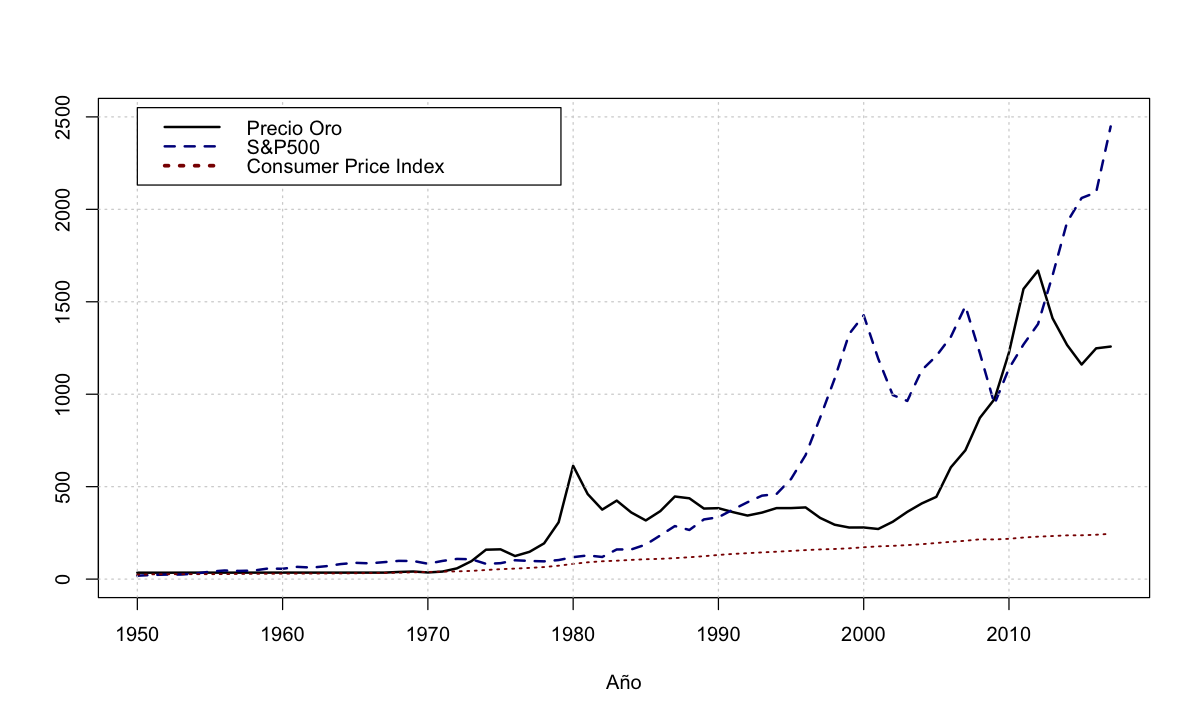

In [227]:
options(repr.plot.width=10, repr.plot.height=6)
with(df_anual,plot(x = ano, y = Price_anual_avg, type = 'l', lwd = 2, col = 'black', ylab = '', xlab = 'Año', ylim=c(0,2500)))
with(df_anual,lines(x = ano, y = SP500_anual_avg, col = 'darkblue',lty = 2, lwd = 2))
with(df_anual,lines(x = ano, y = IPC_anual_avg, col = 'darkred',lty = 3, lwd = 1.5))
grid()
legend(x = 1950, y = 2550,legend = c('Precio Oro', 'S&P500','Consumer Price Index'),lty = c(1,2,3),col = c('black','darkblue','darkred'), lwd=c(2,2,3), bg = 'white')

In [232]:
summary(df_anual)          # Una forma
sapply(df_anual, quantile) # Otra forma usando quantile

      ano       Price_anual_avg   SP500_anual_avg   IPC_anual_avg   
 Min.   :1950   Min.   :  34.63   Min.   :  18.40   Min.   : 24.07  
 1st Qu.:1967   1st Qu.:  35.24   1st Qu.:  84.75   1st Qu.: 33.13  
 Median :1984   Median : 308.75   Median : 160.45   Median :101.74  
 Mean   :1984   Mean   : 378.86   Mean   : 536.35   Mean   :109.71  
 3rd Qu.:2000   3rd Qu.: 427.67   3rd Qu.:1017.80   3rd Qu.:173.42  
 Max.   :2017   Max.   :1668.50   Max.   :2448.22   Max.   :245.12  

,ano,Price_anual_avg,SP500_anual_avg,IPC_anual_avg
0%,1950.00,34.62833,18.4000,24.06667
25%,1966.75,35.24333,84.7475,33.13333
50%,1983.50,308.75133,160.4458,101.74167
75%,2000.25,427.66562,1017.8002,173.41667
100%,2017.00,1668.49708,2448.2175,245.11917


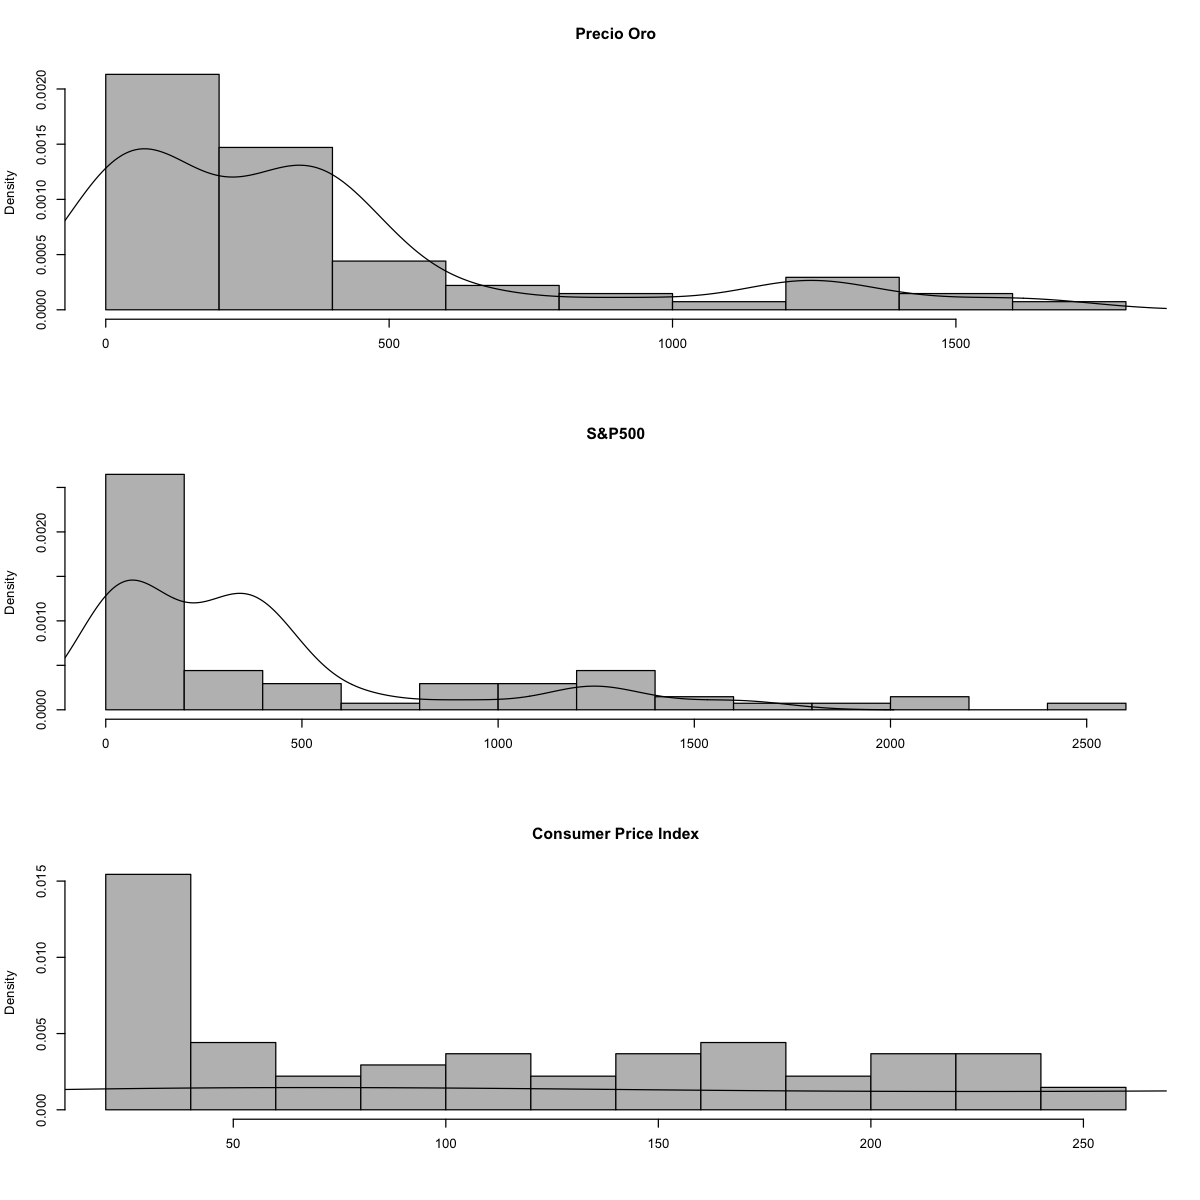

In [251]:
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow = c(3,1))

## grafico_1
hist(df_anual$Price_anual_avg, col = 'grey', breaks = 10, freq = FALSE, main = 'Precio Oro', xlab = '')
lines(density(df_anual$Price_anual_avg))

## grafico_2
hist(df_anual$SP500_anual_avg, col = 'grey', breaks = 10, freq = FALSE, main = 'S&P500', xlab = '')
lines(density(df_anual$Price_anual_avg))

## grafico_3
hist(df_anual$IPC_anual_avg, col = 'grey', freq = FALSE, main = 'Consumer Price Index', xlab = '')
lines(density(df_anual$Price_anual_avg))



